<h1>Customer Churn - Why Do Customers Leave?</h1>

<h2>About our Dataset</h2>

Source - https://www.kaggle.com/blastchar/tece-customer-churn

1. Telecommunications Company customer info.
2. Data Available: Customer IDs, General Customer Info, Subscribed Services, Contract Type, Monthly Charges, etc. 
3. Historic Customer Info - so we have info if the customer has left. 

Field Descriptions
- customerID - Customer's ID
- gender - Male/Female
- SeniorCitizen - flag for Senior or Not (1,0)
- Partner - flag for if a Customer has a partner or Not (Yes, No)
- Dependents - flag for if Customer has dependents or Not (Yes, No)
- Tenure - # of Months Customer has stayed with the company
- PhoneService - flag for if Customer has phone services or not (Yes, No)
- MultipleLines - flag for if Customer has multiple lines or not (Yes, No)
- InternetService - Customer's Internet Service Provider (DSL, Fiber optic, No)
- OnlineSecurity - flag for if Customer has online security or not (Yes, No, No Internet Service)
- OnlineBackup - flag for if Customer has online backup or not (Yes, No, No Internet Service)
- DeviceProtection - flag for if Customer has device protection or not (Yes, No, No Internet Service)
- TechSupport - flag for if the customer has tech support or not (Yes, No, No Internet Service)
- StreamingTV - flag for if the customer has streaming TV or not (Yes, No, No Internet Service)
- StreamingMovies - flag for if the customer has streaming movies or not (Yes, No, No Internet Service)
- Contract - The Term of the Customer Contract (Mth-to-Mth, 1 Year, 2 Years)
- PaperlessBilling - flag for if the customer has paperless billing or not (Yes, No)
- PaymentMethod - flag for the customer's payment method (Eletronic Check, Mailed check bank transfer (auto), CC (auto))
- MonthlyCharges - Amount charged to the customer monthly
- TotalCharges - Total amount charged to the customer
- Churn - flag for if the customer cut ties with the company (Yes, No)

**Customer Churn** - when an existing customer or client ends business ties/relationships with a company.

**Aim** - which customers are likely to churn in the future?

In [1]:
import pandas as pd

# Load Data
churn_df = pd.read_csv("D:\AnacondaProjects\ds_biz_case_studies\datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data check to confirm load
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Getting summary of df
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
# Getting summary of stats of df
churn_df.describe().T # .T Transposing from columns to rows

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
# Are there any null values?
churn_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
# Secondary check for null values
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Confirming number of unique values per column
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
churn_df.Churn.value_counts(sort = False)

No     5174
Yes    1869
Name: Churn, dtype: int64

<h2>Exploratory Data Analysis</h2>

In [8]:
#Backup Copy
churn_df_backup = churn_df.copy()
churn_df_copy = churn_df.copy()

churn_df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
print("Top 5 records with Highest Monthly Charges")
display(churn_df[['customerID', 'MonthlyCharges', 'Churn']].nlargest(5, 'MonthlyCharges'))

Top 5 records with Highest Monthly Charges


,customerID,MonthlyCharges,Churn
4586,7569-NMZYQ,118.75,No
2115,8984-HPEMB,118.65,No
3894,5989-AXPUC,118.60,No
4804,5734-EJKXG,118.60,No
5127,8199-ZLLSA,118.35,Yes


In [10]:
import seaborn as sns
g = sns.catplot(x="Churn", y="MonthlyCharges", data=churn_df, kind="violin", palette=sns.color_palette("Spectral"))

In [11]:
print("10 Lowest Tenure Records with Customer Churn of Yes")
churn_df_min = churn_df[['customerID', 'tenure', 'Churn']]
churn_df_min = churn_df_min[churn_df_min["Churn"] == "Yes"]

display(churn_df_min.nsmallest(10, 'tenure'))

10 Lowest Tenure Records with Customer Churn of Yes


,customerID,tenure,Churn
20,8779-QRDMV,1,Yes
22,1066-JKSGK,1,Yes
27,8665-UTDHZ,1,Yes
80,5919-TMRGD,1,Yes
133,3091-FYHKI,1,Yes
139,0390-DCFDQ,1,Yes
147,2135-RXIHG,1,Yes
180,6317-YPKDH,1,Yes
185,1024-GUALD,1,Yes
207,1285-OKIPP,1,Yes


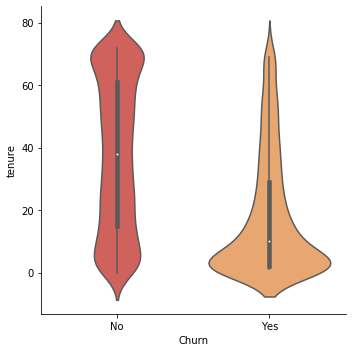

In [12]:
import seaborn as sns
g = sns.catplot(x="Churn", y="tenure", data=churn_df, kind="violin", palette=sns.color_palette("Spectral"))

In [13]:
churn_df_copy.drop(columns=['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)

In [14]:
# Summary of Data 
summary = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

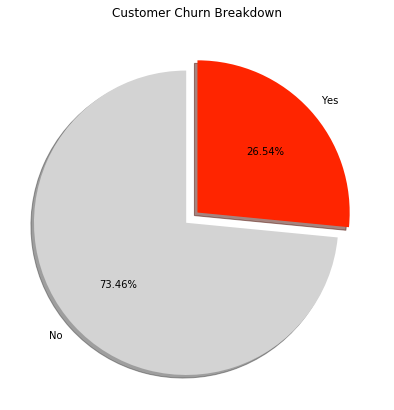

In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams

labels = churn_df.Churn.value_counts(sort = True).index
sizes = churn_df.Churn.value_counts(sort = True)
colors= ['lightgrey', '#ff2500']
explode = (0.1, 0)
rcParams['figure.figsize']= 7,7

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Customer Churn Breakdown')
plt.show()

<h2>Preparing Data for ML Classifier</h2>

In [18]:
# Blanks?
len(churn_df[churn_df['TotalCharges'] == " "])

11

In [19]:
churn_df = churn_df[churn_df.TotalCharges != " "]
len(churn_df[churn_df['TotalCharges'] == " "])

0

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


Id_col = ['customerID']
tgt_col = ['Churn']
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in tgt_col]
num_cols = [x for x in churn_df.columns if x not in cat_cols + tgt_col + Id_col]
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()
multi_cols = [i for i in cat_cols if i not in bin_cols]
le = LabelEncoder()

for i in bin_cols:
    churn_df[i] = le.fit_transform(churn_df[i])

# Dup cols for multi-value cols
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols)
churn_df.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [48]:
std = StandardScaler()

# Scaling Data
scaled = std.fit_transform(churn_df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

# Dropping Original Values merging Scaled Values for numerical columns
telcom_df = churn_df.copy()
churn_df = churn_df.drop(columns = num_cols, axis = 1)
churn_df = churn_df.merge(scaled, left_index=True, right_index=True, how="left")

churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [16]:
churn_df.drop(['customerID'], axis=1, inplace=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,NaN,NaN,NaN


In [55]:
# Turning Null values into averages for the column
churn_df.fillna(churn_df.mean(), inplace=True)
churn_df.tail(11)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,0.000538,-0.000271,0.00045
7033,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0.000538,-0.000271,0.00045
7034,0,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,0.000538,-0.000271,0.00045
7035,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0.000538,-0.000271,0.00045
7036,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0.000538,-0.000271,0.00045
7037,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0.000538,-0.000271,0.00045
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0.000538,-0.000271,0.00045
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,0.000538,-0.000271,0.00045
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0.000538,-0.000271,0.00045
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,0.000538,-0.000271,0.00045


In [57]:
# Confirming that Null values were converted into values of the mean for the column
churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.000538,-0.000271,0.000450
std,0.999358,0.999215,0.999496
min,-1.280248,-1.547283,-0.999069
25%,-0.954296,-0.968899,-0.829846
50%,-0.139417,0.182882,-0.389260
75%,0.919926,0.832733,0.664649
max,1.612573,1.793381,2.824261


<h2>Modeling</h2>

In [ ]:
from sklearn.model_selection import train_test_split

X = churn_df.drop(['Churn'], axis=1).values
y = churn_df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.head()